In [1]:
%matplotlib notebook
########################################
#00     I/O  & Table S/U               #
#   a- import code.                    #
#   b- associate files to variables.   # 
#   c- read input files into df's.     #
########################################

#a
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import warnings; warnings.simplefilter('ignore')

#b
complete_data ="data/censusdata_complete.csv"
monthly_data ="data/censusdata_monthly_sales_both.csv"
annual_data ="data/censusdata_yearly_sales_both.csv"

#c
complete_df = pd.read_csv(complete_data)
monthly_df = pd.read_csv(monthly_data)
annual_df = pd.read_csv(annual_data)

In [5]:
####################################################################
#01    Dataframes for graphing                                     #
#   a- create annual df up to 2019 for comparing full year data.   #
#      create so far data for 2020.                                #
#   b- create change in monthly sales df's.                        #
####################################################################

#a
annual_19 = annual_df[annual_df["year"] < 2020]


sales_15to20 = complete_df[((complete_df["year"] >= 2015) & (complete_df["year"] <= 2020)) &
                            (complete_df["dt_code"] == "SM") &  (complete_df["cat_code"] == "4541")]

perchange_15to20 = complete_df[((complete_df["year"] >= 2015) & (complete_df["year"] <= 2020)) &
                            (complete_df["dt_code"] == "MPCSM") &  (complete_df["cat_code"] == "4541")]

sales_19and20 = sales_15to20[(sales_15to20["year"] == 2019) | (sales_15to20["year"] == 2020)]

just_14 = sales_15to20[sales_15to20["year"] == 2014]
just_15 = sales_15to20[sales_15to20["year"] == 2015]
just_16 = sales_15to20[sales_15to20["year"] == 2016]
just_17 = sales_15to20[sales_15to20["year"] == 2017]
just_18 = sales_15to20[sales_15to20["year"] == 2018]
just_19 = sales_15to20[sales_15to20["year"] == 2019]
just_20 = sales_19and20[sales_19and20["year"] == 2020]


just_14.reset_index(inplace=True,drop=True)
just_15.reset_index(inplace=True,drop=True)
just_16.reset_index(inplace=True,drop=True)
just_17.reset_index(inplace=True,drop=True)
just_18.reset_index(inplace=True,drop=True)
just_19.reset_index(inplace=True,drop=True)
just_20.reset_index(inplace=True,drop=True)
sales_19and20.reset_index(inplace=True,drop=True)
sales_15to20.reset_index(inplace=True,drop=True)
annual_19.reset_index(inplace=True,drop=True)

months = ("Jan", "Feb", "Mar", "Apr", "May")
first5_perchange = perchange_15to20[(perchange_15to20["month"] == "Jan") | (perchange_15to20["month"] == "Feb") |
                                    (perchange_15to20["month"] == "Mar") | (perchange_15to20["month"] == "Apr") |
                                    (perchange_15to20["month"] == "May")]
first5_perchange.reset_index(inplace=True,drop=True)

first5_Jan = first5_perchange[first5_perchange["month"] == "Jan"]
first5_Feb = first5_perchange[first5_perchange["month"] == "Feb"]
first5_Mar = first5_perchange[first5_perchange["month"] == "Mar"]
first5_Apr = first5_perchange[first5_perchange["month"] == "Apr"]
first5_May = first5_perchange[first5_perchange["month"] == "May"]
first5_Jan.reset_index(inplace=True,drop=True)
first5_Feb.reset_index(inplace=True,drop=True)
first5_Mar.reset_index(inplace=True,drop=True)
first5_Apr.reset_index(inplace=True,drop=True)
first5_May.reset_index(inplace=True,drop=True)



years = ("2015", "2016", "2017", "2018", "2019", "2020")
                            
first5_delta = pd.DataFrame({"year": years, "Jan": first5_Jan["amount"], "Feb": first5_Feb["amount"],
                            "Mar": first5_Mar["amount"], "Apr": first5_Apr["amount"], "May": first5_May["amount"]})                           

                               
#b
ecomm_perchange = complete_df[(complete_df["dt_code"] == "MPCSM") & (complete_df["cat_code"] == "4541")]
ecomm_perchange.reset_index(inplace=True,drop=True)

comm_perchange = complete_df[(complete_df["dt_code"] == "MPCSM") & (complete_df["cat_code"] == "44W72")]
comm_perchange.reset_index(inplace=True,drop=True)

In [6]:
first5_delta

,year,Jan,Feb,Mar,Apr,May
0,2015,-37.3,-5.6,13.9,-1.6,-0.9
1,2016,-38.1,0.7,11.1,-4.1,4.3
2,2017,-34.9,-5.5,16.3,-6.1,8.9
3,2018,-33.4,-5.7,13.5,-2.6,6.9
4,2019,-23.2,-6.5,8.6,4.1,7.8
5,2020,-33.9,-4.2,15.9,11.8,8.6


####  Section 10:   Monthly and Annual Sales graphing for Ecomm and In Store   ###

In [ ]:
######################################################
#10.1  Line graph Monthly Sales 2010-2020 Ecomm      #
#   - change units from millions to billions.        #
######################################################

#a
line_x = monthly_df.index
line_y = monthly_df["ecomm sales"] / 1000
line_xlabel = ""
line_xticks = monthly_df["year"].unique()

line_ylabel = "Billions of Dollars"
line_title = "US E comm Monthly sales 2010 - 2020"

plt.style.use("seaborn")
plt.figure()
plt.plot(line_x, line_y)
#plt.fill_between(line_x, line_y, color = "r", alpha = 0.5)
plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(line_x[::12], line_xticks, rotation=25)

plt.show()
#plt.savefig("Data/USCensus_ecomm_tenyear_monthly_sales.png")

In [ ]:
######################################################
#10.2  Line graph Monthly Sales 2010-2020 In Store   #
#   - change units from millions to billions.        #
######################################################

#a
line_x = monthly_df.index
line_y = monthly_df["instore sales"] / 1000

line_xlabel = ""
line_xticks = monthly_df["year"].unique()

line_ylabel = "Billions of Dollars"
line_title = "US In Store Monthly sales 2010 - 2020"

plt.style.use("seaborn")
plt.figure()
plt.plot(line_x, line_y)
plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(line_x[::12], line_xticks, rotation=25)

plt.show()
#plt.savefig("Data/USCensus_comm_tenyear_monthly_sales.png")

In [ ]:
######################################################
#10.3  Line graph Annual Sales 2010-2019 Ecomm       #
#   - change units from millions to billions.        #
######################################################

#a
line_x = annual_19["year"]
line_y = annual_19["ecomm sales"] / 1000
line_xlabel = ""
line_xticks = annual_19["year"].unique()

line_ylabel = "Billions of Dollars"
line_title = "US E comm Annual sales 2010 - 2020"

plt.style.use("seaborn")
plt.figure()
plt.plot(line_x, line_y,color="red")
#plt.fill_between(line_x, line_y, color = "r", alpha = 0.5)
plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(rotation=25)

plt.show()
#plt.savefig("Data/USCensus_ecomm_tenyear_monthly_sales.png")

In [ ]:
######################################################
#10.4  Line graph Annual Sales 2010-2019 In Store           #
#   - change units from millions to billions.        #
######################################################

#a
line_x = annual_19["year"]
line_y = annual_19["ecomm sales"] / 1000
line_xlabel = ""
line_xticks = annual_19["year"].unique()

line_ylabel = "Billions of Dollars"
line_title = "US In Store Annual sales 2010 - 2020"

plt.style.use("seaborn")
plt.figure()
plt.plot(line_x, line_y,color="red")
#plt.fill_between(line_x, line_y, color = "r", alpha = 0.5)
plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(rotation=25)

plt.show()
#plt.savefig("Data/USCensus_ecomm_tenyear_monthly_sales.png")

####  Section 20:   Monthly Percent Change graphing for Ecomm and In Store   ###

In [ ]:
##############################################################
#20.1  line Graph  perchange Ten Year Monthly ecomm                       #
#   a- set up variables for linegraph and call makeline().   #
#   b- display graph and write out as .png file.             #
##############################################################

#a
line_x = ecomm_perchange.index
line_y = ecomm_perchange["amount"]

line_xticks = ecomm_perchange["year"].unique()

line_ylabel = "Percentage"
line_title = "US E comm Monthly Growth Rates 2010 - 2020"

plt.style.use("seaborn")
plt.figure()
plt.plot(line_x, line_y,color="red",alpha=.7)
plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(line_x[::12], line_xticks, rotation=25)

plt.show()
#plt.savefig("Data/USCensus_ecomm_tenyear_monthly_growth.png")

In [ ]:
####  Section 30:   Monthly Percent Change graphing for Ecomm and In Store   ###

In [ ]:
###############################33
#30.1   bar graph percentage ecomm to retail annual 2010-20
#####################################33

xaxis = annual_df["year"]
yaxis = annual_df["ecomm %"]
plt.title("E-comm Percentage of Retail Sales")
plt.xlabel("Year")
plt.ylabel("Percent")

plt.bar(xaxis, yaxis, alpha=0.5, align="center")
plt.show()

In [ ]:
just_19

In [ ]:
###################################33
#40.1  2020 graph
######################################

#a
line_x = sofar_20["month"]
line_y = sofar_20["amount"] / 1000
line_xlabel = ""
#line_xticks = sofar_20["year"].unique()

line_ylabel = "Billions of Dollars"
line_title = "US E comm Annual sales 2010 - 2020"

plt.style.use("seaborn")
plt.figure()
plt.plot(line_x, line_y,color="red")
#plt.fill_between(line_x, line_y, color = "r", alpha = 0.5)
plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
#plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(rotation=25)

plt.show()
#plt.savefig("Data/USCensus_ecomm_tenyear_monthly_sales.png")

In [ ]:
###################################33
#40.2  2019 an 20  graph
######################################

#a
line_x = sales_19and20.index#["month"]
line_y = sales_19and20["amount"] / 1000
line_xlabel = ""
#line_xticks = sofar_20["year"].unique()

line_ylabel = "Billions of Dollars"
line_title = "US E comm Annual sales 2010 - 2020"

plt.style.use("seaborn")
plt.figure()
plt.plot(line_x, line_y,color="red")
#plt.fill_between(line_x, line_y, color = "r", alpha = 0.5)
plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
#plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(rotation=25)

plt.show()
#plt.savefig("Data/USCensus_ecomm_tenyear_monthly_sales.png")

<IPython.core.display.Javascript object>


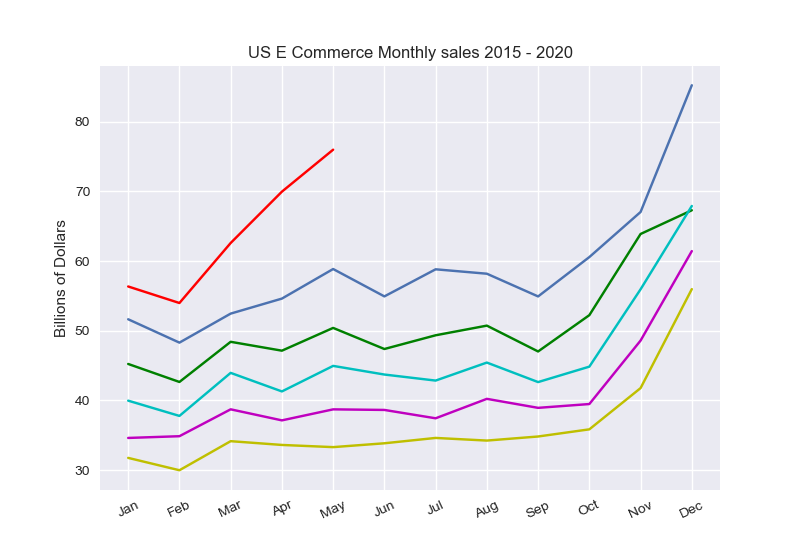

In [9]:
######################################################
#10.2  Line graph Monthly 2020 over 2019   #
#   - change units from millions to billions.        #
######################################################

#a
line_x9 = just_19["month"]
line_y9 = just_19["amount"] / 1000

line_xlabel = ""
line_xticks = just_19["month"]
line_ylabel = "Billions of Dollars"
line_title = "US E Commerce Monthly sales 2015 - 2020"

plt.style.use("seaborn")
plt.figure()
plt.plot(line_x9, line_y9)
plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
#plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(rotation=25)

plt.show()
#plt.savefig("Data/USCensus_comm_tenyear_monthly_sales.png")

In [10]:
####################
#  Overlay Lines of Monthly Sales
####################################

#2020
line_x2 = just_20["month"]
line_y2 = just_20["amount"] / 1000
plt.plot(line_x2, line_y2,color="r")

# #2019
# line_x = just_19["month"]
# line_y = just_19["amount"] / 1000
# plt.plot(line_x, line_y,color="o")

#2018
line_x8 = just_18["month"]
line_y8 = just_18["amount"] / 1000
plt.plot(line_x8, line_y8,color="g")

#2017
line_x7 = just_17["month"]
line_y7 = just_17["amount"] / 1000
plt.plot(line_x7, line_y7,color="c")

#2016
line_x6 = just_16["month"]
line_y6 = just_16["amount"] / 1000
plt.plot(line_x6, line_y6,color="m")

#2015
line_x5 = just_15["month"]
line_y5 = just_15["amount"] / 1000
plt.plot(line_x5, line_y5,color="y")


In [ ]:
ecomm_sales_10["amount"][0]

In [ ]:
##########################################################################################
# 00.2    Makeline Function (makeline)                                                   #
#          > create line chart                                                           #
#   Positional Inputs[Required]: line_x, line_y = x and y coordinates for data points.   #  
#   Keyword Inputs[Optional]: line_title = title for the graph,                          #
#                             line_xlabel & line_ylabel = axes labels,                   #
#                             line_type = graph style type.                              #
#                             line_fig = plt.figure settings.                            #
##########################################################################################

def makeline (line_x,line_y,line_title="",line_xlabel="",line_ylabel="",line_type = "seaborn",line_fig=""):
    plt.style.use(line_type)
    plt.figure()

    plt.plot(line_x, line_y)
    plt.title(line_title)
    plt.xlabel(line_xlabel)
    plt.ylabel(line_ylabel)
    plt.xlim(line_x[0], line_x[len(line_x)-1])
    plt.xticks(rotation=25)